# Momentum

## Momentum é uma extensão do gradiente descendente.

## GD é suceptível a ruído nos dados, o que pode levar o mesmo a ficar em mínimo local, algo que não desejamos.

## Para evitar o zig-zag da imagem abaixo, podemos tomar uma média móvel dos erros anteriores, de forma a suavilizar a descida até o mínimo

## De forma que a nova formula para a atualização dos pesos seja:

## $w_i = w_{i-1} + v'$

## Em que $ v' = \gamma v  - \alpha \frac{dL}{dw}$

## $v$ é o erro anterior, gamma é uma nova taxa de aprendizado, geralmente usamos 0.9!

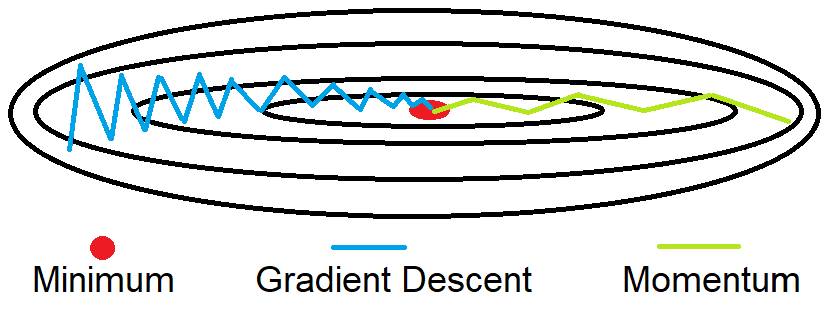

## imagem retirada de https://www.andreaperlato.com/aipost/gradient-descent-with-momentum/

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
f = lambda x,w: x @ w # Função que descreve uma parabola para o nosso caso, em que temos
# f: X[:,0]*w[0] + X[:,1]*w[1] + X[:,2]*w[2]

w = np.random.normal(0,1,(3,1)) # pesos

X = np.arange(-20,20,0.1).reshape(-1,1) # dados

y = X**2 + 5*X + 1 # função a ser encontrada, que não conhecemos, porém sabemos é uma função polinomial 

X_in = np.append(X**2,np.append(X,np.ones(X.shape),axis = 1),axis = 1).reshape(-1,3) # adicionando 1 para poder fazer o produto interno ao invés de multiplicações
print(X_in)

[[400.   -20.     1.  ]
 [396.01 -19.9    1.  ]
 [392.04 -19.8    1.  ]
 ...
 [388.09  19.7    1.  ]
 [392.04  19.8    1.  ]
 [396.01  19.9    1.  ]]


In [5]:
def grad_momentum(X,y,w,gamma= 0.9,lr = 0.001):
    lr = 0.00001
    loss_a = [0 for i in range(len(w))]
    for _ in range(1000):
        yhat = f(X,w)
        loss = np.mean((y - yhat)**2)
        for i in range(len(w)):
            w[i] += gamma*loss_a[i] + (lr*(y-yhat).T @ X[:,i])/len(yhat)
            loss_a[i] = (lr*(y-yhat).T @ X[:,i])/len(yhat)
        print('loss:',loss)

    return w.reshape(-1,1)

In [10]:
for i in range(100):
    w = grad_momentum(X_in,y,w)
    print(w)

loss: 0.0011853204503073245
loss: 0.001185309914310488
loss: 0.0011852898960925439
loss: 0.001185269878174688
loss: 0.0011852498605947742
loss: 0.0011852298433533996
loss: 0.001185209826449922
loss: 0.0011851898098839985
loss: 0.0011851697936568215
loss: 0.0011851497777672173
loss: 0.0011851297622157344
loss: 0.0011851097470024262
loss: 0.0011850897321270136
loss: 0.0011850697175896682
loss: 0.0011850497033905128
loss: 0.0011850296895290053
loss: 0.0011850096760058376
loss: 0.0011849896628204526
loss: 0.0011849696499733678
loss: 0.0011849496374639946
loss: 0.0011849296252927426
loss: 0.001184909613459464
loss: 0.001184889601963949
loss: 0.0011848695908066365
loss: 0.0011848495799873804
loss: 0.0011848295695055207
loss: 0.0011848095593623815
loss: 0.0011847895495565464
loss: 0.0011847695400891264
loss: 0.0011847495309590908
loss: 0.001184729522167697
loss: 0.0011847095137136473
loss: 0.0011846895055974429
loss: 0.0011846694978195707
loss: 0.0011846494903794136
loss: 0.001184629483277012

Pesos finais:  [1.00009252 5.00000557 0.97779517]


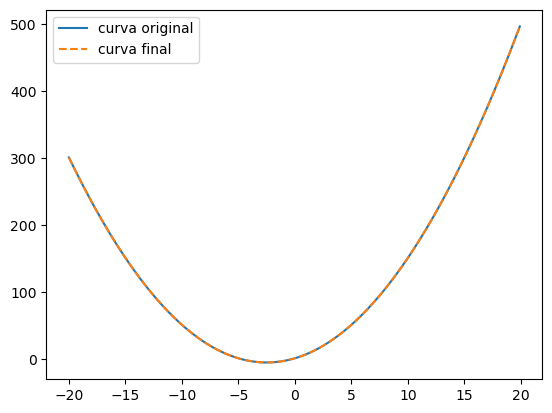

In [13]:
print('Pesos finais: ', w.flatten())

plt.plot(X,y,label = 'curva original')
plt.plot(X,f(X_in,w),'--',label = 'curva final')
plt.legend()

## Ao usar o algoritmo é possível notar que ele converge mais rápido do que o GD simples. Se realizarmos GD com mini-batch + momentum, fica ainda mais rápido!!!